<a href="https://colab.research.google.com/github/Michelhsn/Automating-Remote_Data_Analysis/blob/master/Coronavirus_worldwide_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')

In [0]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [0]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [0]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


### AGRUPANDO POR DATA

In [0]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


## PLOTANDO AS MORTES

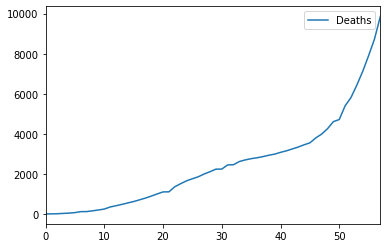

In [0]:
mortes.plot()

![alt text](https://miro.medium.com/max/864/1*HgDtNHGhlgnVg61zf86ZMw.png)

# **Prophet**


O Profeta segue o modelo da API Scikit Learn, onde você cria uma instância da classe Prophet, em seguida, chama os métodos "fit" e "predict".


O Prophet é construído com seu back-end em STAN, uma linguagem de programação probabilística. Isso permite que o Prophet tenha muitas das vantagens oferecidas pelas estatísticas bayesianas, incluindo sazonalidade, inclusão de conhecimento de domínio e intervalos de confiança para criar uma estimativa de risco baseada em dados.

A entrada para o Prophet é flexível porque permite que um Dataframe do pandas possa ser usado como entrada de dados


Referências:
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet




## Formato das colunas de dados: **ds** e **y**. 

A coluna **ds** (date) deve ter o formato esperado pelo Pandas, idealmente AAAA-MM-DD para uma data ou AAAA-MM-DD HH: MM: SS para timestamp. 

A coluna **y**  deve ser numérica e representa a medida que desejamos prever.

CRIANDO AS COLUNAS 


*   ds
*   y



In [0]:
mortes.tail()

,Date,Deaths
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


In [0]:
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


In [0]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
53,2020-03-15,6440.0
54,2020-03-16,7126.0
55,2020-03-17,7905.0
56,2020-03-18,8733.0
57,2020-03-19,9867.0


## **Previsão de MORTES da COVID-19 no mundo**

Vamos realizar uma previsão de uma semana (periods=30), com intervalos de 95%. 

# **Confiança**

Nas Séries Temporais a tendencia muda o tempo todo. Isso é histórico. Por isso 
é impossível ter certeza, então faremos a coisa mais razoável possível e assumimos que o futuro sofrerá mudanças de tendência.

Nesse caso, assumiremos um intervalo de confiança de 95%, ou seja admitimos um erro de 5%. 


In [0]:
dias = 30

In [0]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
58,2020-03-20
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [0]:
previsao = m.predict(futuro)
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
58,2020-03-20,8754.692977,8119.233433,9323.220210,8742.490069,8768.363415,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,8708.340669
59,2020-03-21,9157.418961,8534.745782,9750.027602,9118.546051,9196.147405,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,0.0,0.0,0.0,9119.697805
60,2020-03-22,9560.144945,8880.463283,10097.199032,9481.858696,9629.026062,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,9513.609318
61,2020-03-23,9962.870929,9334.753466,10525.492859,9850.341861,10069.542627,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,0.0,0.0,0.0,9928.750494
62,2020-03-24,10365.596913,9723.088631,10993.094192,10217.195557,10521.434676,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,0.0,0.0,0.0,10360.141398
63,2020-03-25,10768.322897,10191.192811,11495.482695,10571.715236,10981.132555,59.363347,59.363347,59.363347,59.363347,59.363347,59.363347,0.0,0.0,0.0,10827.686244
64,2020-03-26,11171.048881,10621.207303,11950.062084,10918.540652,11439.514902,110.821693,110.821693,110.821693,110.821693,110.821693,110.821693,0.0,0.0,0.0,11281.870574
65,2020-03-27,11573.774865,10866.213817,12248.485309,11275.732394,11906.141103,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,-46.352308,0.0,0.0,0.0,11527.422557
66,2020-03-28,11976.500848,11265.895262,12673.652382,11617.197922,12363.576685,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,-37.721156,0.0,0.0,0.0,11938.779692
67,2020-03-29,12379.226832,11592.700820,13099.818700,11959.840770,12833.626385,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,12332.691206


In [0]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
58,2020-03-20,8119.233433,8708.340669,9323.220210
59,2020-03-21,8534.745782,9119.697805,9750.027602
60,2020-03-22,8880.463283,9513.609318,10097.199032
61,2020-03-23,9334.753466,9928.750494,10525.492859
62,2020-03-24,9723.088631,10360.141398,10993.094192
63,2020-03-25,10191.192811,10827.686244,11495.482695
64,2020-03-26,10621.207303,11281.870574,11950.062084
65,2020-03-27,10866.213817,11527.422557,12248.485309
66,2020-03-28,11265.895262,11938.779692,12673.652382
67,2020-03-29,11592.700820,12332.691206,13099.818700


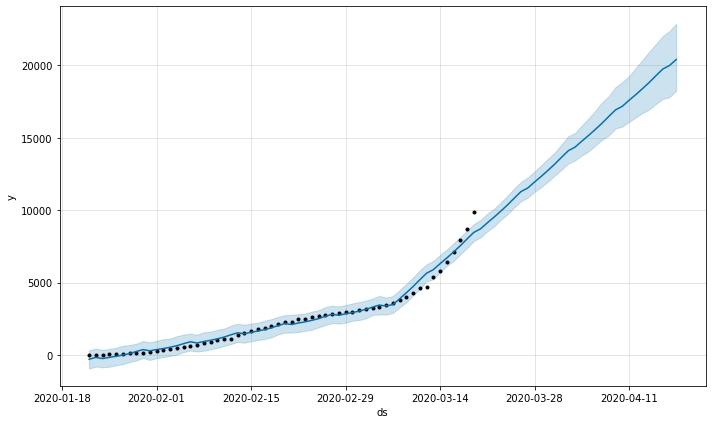

In [0]:
confirmed_forecast_plot = m.plot(previsao)